In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.services.group_data import group_data
from src.models.statistics import Statistics

In [2]:
data, stats = group_data()

100%|██████████| 127/127 [00:48<00:00,  2.64it/s]


In [20]:
print(f"Total number of groups: {len(data.keys())}")

Total number of groups: 131


## Groups histogram

<Figure size 640x480 with 0 Axes>

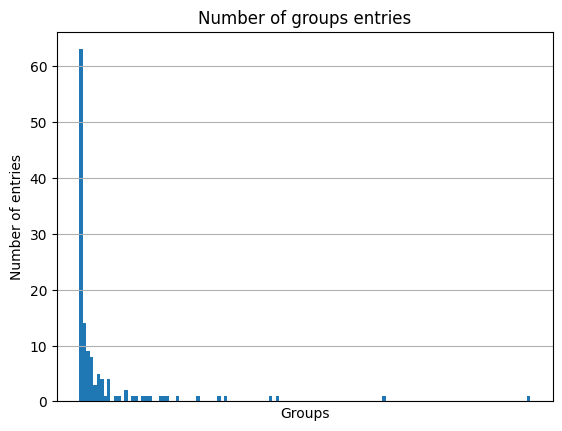

In [21]:
group_data = []

for group in data.keys():
    group_data.append({"key": group, "value": len(data[group])})

plt.figure()
pd.DataFrame(group_data).hist(bins=len(data.keys()))
plt.title("Number of groups entries")
plt.ylabel("Number of entries")
plt.xlabel("Groups")
plt.xticks(ticks=[])
plt.show()

**Conclusion**: Groups are strongly unbalanced. Only a few of them have more data waveforms. The others occur occasionally in the data. Because they are sequential data, data augmentation is difficult.

## Example group data

In [22]:
example_group = ('KUKA', 'FOLGE21', '00')
example_group_data = data[example_group]

print(f"Size of example data: {len(example_group_data)}")

Size of example data: 672


In [23]:
example_group_data[0].head()

,id,robot,program,timestamp,time,given_laser_power,given_wire_speed,real_wire_speed,binzel_motor_0_current,binzel_motor_1_current,scansonic_head_angle,scansonic_tip_depth,model,no,wire_speed_projection,inverse_wire_speed_projection
0,KUKA_ECCFC94D66_20240404_123930-FOLGE21,KUKA,FOLGE21,2024-04-04T12:38:34.540Z,0.000,0.090175,0.045088,0.0,0,51,-0.000183,0.002014,00,1,0.0,0.0
1,KUKA_ECCFC94D66_20240404_123930-FOLGE21,KUKA,FOLGE21,2024-04-04T12:38:34.540Z,0.000,0.800001,0.400000,0.0,0,51,-0.000183,0.002014,00,1,0.0,0.0
2,KUKA_ECCFC94D66_20240404_123930-FOLGE21,KUKA,FOLGE21,2024-04-04T12:38:34.825Z,0.285,0.800001,0.400000,0.0,0,51,-0.000183,0.002014,00,1,0.0,0.0
3,KUKA_ECCFC94D66_20240404_123930-FOLGE21,KUKA,FOLGE21,2024-04-04T12:38:35.031Z,0.491,0.800001,0.400000,0.0,0,51,-0.000183,0.002014,00,1,0.0,0.0
4,KUKA_ECCFC94D66_20240404_123930-FOLGE21,KUKA,FOLGE21,2024-04-04T12:38:35.062Z,0.522,0.800001,0.400000,0.0,0,51,-0.000183,0.002014,00,1,0.0,0.0


In [24]:
example_group_data[0].describe()

,time,given_laser_power,given_wire_speed,real_wire_speed,binzel_motor_0_current,binzel_motor_1_current,scansonic_head_angle,scansonic_tip_depth,no,wire_speed_projection,inverse_wire_speed_projection
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.0,498.000000,498.000000
mean,30.816365,0.735247,0.340800,0.305362,64.387550,67.052209,-0.000076,-0.000601,1.0,0.827888,0.907552
std,17.547849,0.215469,0.103590,0.123812,28.474925,12.808027,0.000173,0.000950,0.0,0.329006,0.365300
min,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,-0.000519,-0.001251,1.0,0.000000,0.000000
25%,15.788000,0.799988,0.340909,0.325566,59.250000,59.000000,-0.000183,-0.001068,1.0,0.950293,1.034422
50%,30.794000,0.800000,0.340909,0.329076,71.000000,65.000000,0.000000,-0.000916,1.0,0.957188,1.040736
75%,45.617250,0.800000,0.400000,0.382116,80.750000,76.750000,0.000061,-0.000793,1.0,0.963454,1.047126
max,63.354000,0.800009,0.400005,0.389883,107.000000,107.000000,0.000244,0.002136,1.0,1.119504,1.942210


### Statistics for example model group in first second

In [25]:
example_statistics = stats[example_group][1]
pd.DataFrame(example_statistics)

,count,mean,median,stdev,max
time,3883,0.426250,0.443000,0.331347,0.999000
given_laser_power,3883,0.597894,0.800001,0.320609,0.800001
given_wire_speed,3883,0.298823,0.400000,0.160245,0.400000
real_wire_speed,3883,0.000770,0.000000,0.015991,0.351095
binzel_motor_0_current,3883,0.127479,0.000000,2.669590,71.000000
binzel_motor_1_current,3883,49.499356,49.000000,8.017927,81.000000
scansonic_head_angle,3883,-0.000172,-0.000183,0.000024,0.000000
scansonic_tip_depth,3883,0.001999,0.002014,0.000162,0.002045
no,3883,336.052794,336.000000,195.394709,672.000000
wire_speed_projection,3883,0.002149,0.000000,0.044622,0.965511


In [26]:
def plot_statistics(statistics: list, var: str):
    plt.figure()
    mean = np.array([stat['mean'][[var]] for stat in statistics.values()])
    std = np.array([stat['stdev'][[var]] for stat in statistics.values()])
    x = range(len(mean))

    plt.plot(x, mean)
    plt.fill_between(x, np.squeeze(mean - std), np.squeeze(mean + std), alpha=0.2)
    plt.show()

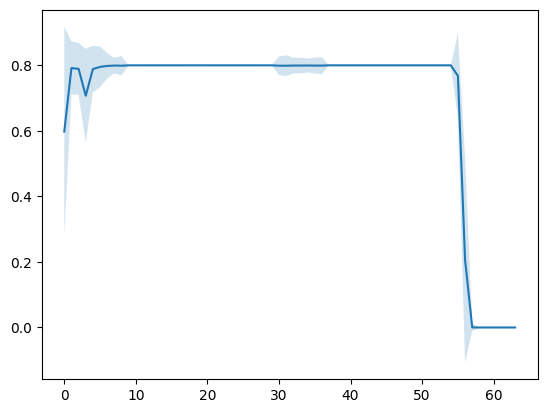

In [27]:
plot_statistics(stats[example_group], 'given_laser_power')

In [28]:
def plot_variable(data, var):
    plt.figure()
    x = data['time']
    y = data[var]
    plt.plot(x, y)
    plt.show()

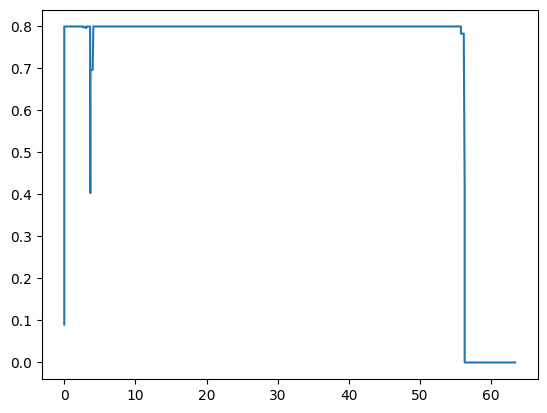

In [29]:
plot_variable(example_group_data[0], 'given_laser_power')

In [30]:
def compare_stats(var, stats, data):
    plt.figure()
    mean = np.array([stat['mean'][[var]] for stat in stats.values()])
    std = np.array([stat['stdev'][[var]] for stat in stats.values()])
    x1 = range(len(mean))

    plt.plot(x1, mean, color='blue', label="Mean")
    plt.fill_between(x1, np.squeeze(mean - std), np.squeeze(mean + std), color='blue', alpha=0.2)

    x2 = data['time']
    y2 = data[var]
    plt.plot(x2, y2, color='red', label="Real data")
    plt.legend()
    plt.show()
    

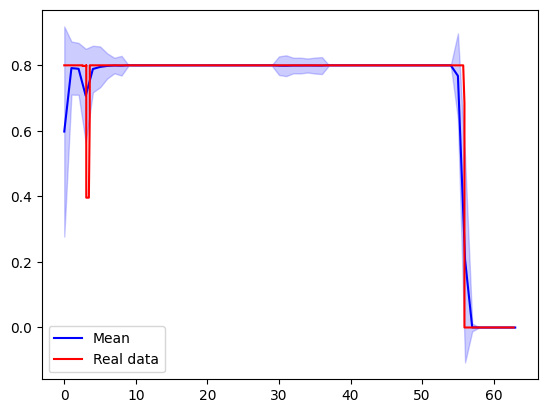

In [31]:
compare_stats('given_laser_power', stats[example_group], example_group_data[50])

In [32]:
data[example_group][20]

,id,robot,program,timestamp,time,given_laser_power,given_wire_speed,real_wire_speed,binzel_motor_0_current,binzel_motor_1_current,scansonic_head_angle,scansonic_tip_depth,model,no,wire_speed_projection,inverse_wire_speed_projection
0,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:19:52.651Z,0.000,0.000000,0.000000,0.0,0,53,-0.000183,0.002014,00,21,0.0,0.0
1,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:19:52.651Z,0.000,0.513459,0.256729,0.0,0,53,-0.000183,0.002014,00,21,0.0,0.0
2,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:19:52.999Z,0.348,0.513459,0.256729,0.0,0,53,-0.000183,0.002014,00,21,0.0,0.0
3,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:19:53.158Z,0.507,0.800001,0.400000,0.0,0,53,-0.000183,0.002014,00,21,0.0,0.0
4,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:19:53.427Z,0.776,0.800001,0.400000,0.0,0,53,-0.000183,0.002014,00,21,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:20:54.624Z,61.973,0.000000,0.000000,0.0,0,62,-0.000122,0.002045,00,21,0.0,0.0
512,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:20:54.831Z,62.180,0.000000,0.000000,0.0,0,62,-0.000122,0.002045,00,21,0.0,0.0
513,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:20:55.037Z,62.386,0.000000,0.000000,0.0,0,62,-0.000122,0.002045,00,21,0.0,0.0
514,KUKA_ECCFC94D66_20240321_152050-FOLGE21,KUKA,FOLGE21,2024-03-21T15:20:55.243Z,62.592,0.000000,0.000000,0.0,0,62,-0.000122,0.002045,00,21,0.0,0.0


In [33]:
pd.DataFrame(stats[[(('KUKA', 'FOLGE21', '00'))][0]][1])

,count,mean,median,stdev,max
time,3883,0.426250,0.443000,0.331347,0.999000
given_laser_power,3883,0.597894,0.800001,0.320609,0.800001
given_wire_speed,3883,0.298823,0.400000,0.160245,0.400000
real_wire_speed,3883,0.000770,0.000000,0.015991,0.351095
binzel_motor_0_current,3883,0.127479,0.000000,2.669590,71.000000
binzel_motor_1_current,3883,49.499356,49.000000,8.017927,81.000000
scansonic_head_angle,3883,-0.000172,-0.000183,0.000024,0.000000
scansonic_tip_depth,3883,0.001999,0.002014,0.000162,0.002045
no,3883,336.052794,336.000000,195.394709,672.000000
wire_speed_projection,3883,0.002149,0.000000,0.044622,0.965511


In [34]:
pd.DataFrame(stats).to_json("stats.json")

In [35]:
def find_entry_by_id(data, id):
    for group in data:
        for entry in data[group]:
            if entry.iloc[0]['id'] == id:
                return entry
    return None

In [36]:
faults = [find_entry_by_id(data, "KUKA_ECCFC94D66_20240321_160140-FOLGE21"), find_entry_by_id(data, "KUKA_ECCFC94D66_20240322_040640-FOLGE21")]

normal = stats[('KUKA', 'FOLGE21', '00')]

In [37]:
def compare_faults_normal(faults, normal, var):
    plt.figure()
    mean = np.array([stat['mean'][[var]] for stat in normal.values()])
    std = np.array([stat['stdev'][[var]] for stat in normal.values()])
    x1 = range(len(mean))

    plt.plot(x1, mean, color='blue', label="Normal")
    plt.fill_between(x1, np.squeeze(mean - std), np.squeeze(mean + std), color='blue', alpha=0.2)

    for fault in faults:
        x2 = fault['time']
        y2 = fault[var]
        plt.plot(x2, y2, label="Fault", color='red')

    plt.legend()
    plt.show()

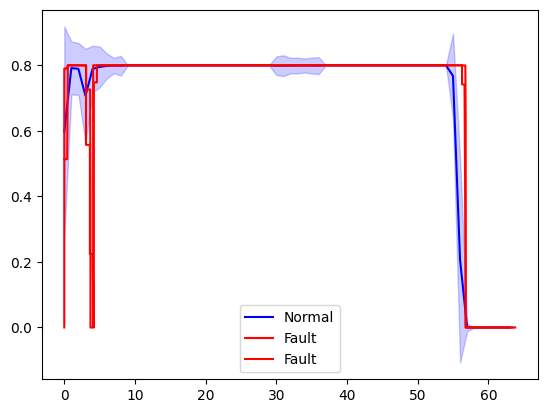

In [38]:
compare_faults_normal(faults, normal, 'given_laser_power')

In [39]:
faults2 = [find_entry_by_id(data, "KAA3G1224240R04_20240127_061510-FOLGE37")]

normal2 = stats[('KAA3G1224240R04', 'FOLGE37', '10')]

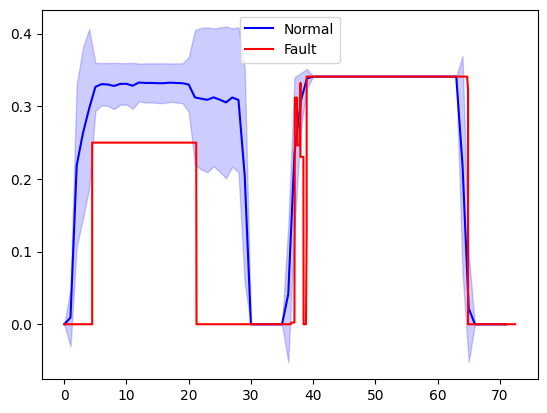

In [40]:
compare_faults_normal(faults2, normal2, 'given_wire_speed')

## Binzel motor current

In [41]:
binzel_data = []
for entry in data[('KAA3G1224240R04', 'FOLGE37', '10')]:
    binzel_data.append((entry['timestamp'][0], entry['binzel_motor_0_current'].mean()))

In [42]:
binzel_data = sorted(binzel_data, key=lambda x: pd.Timestamp(x[0]))

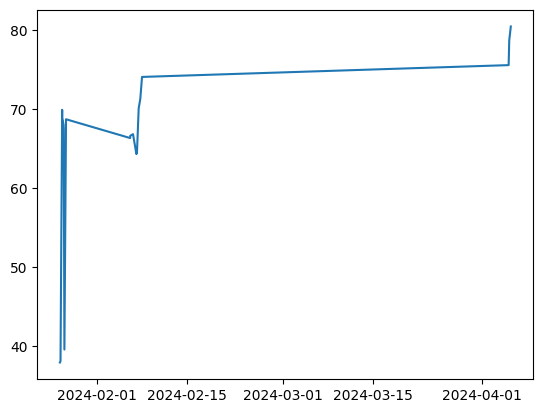

In [43]:
plt.figure()
x = [pd.Timestamp(entry[0]).to_numpy() for entry in binzel_data]
y = [entry[1] for entry in binzel_data]
plt.plot(x, y)

In [44]:
binzel_1_data = []
for entry in data[('KAA3G1224240R04', 'FOLGE37', '10')]:
    binzel_1_data.append((entry['timestamp'][0], entry['binzel_motor_1_current'].mean()))

In [45]:
binzel_1_data = sorted(binzel_1_data, key=lambda x: pd.Timestamp(x[0]))

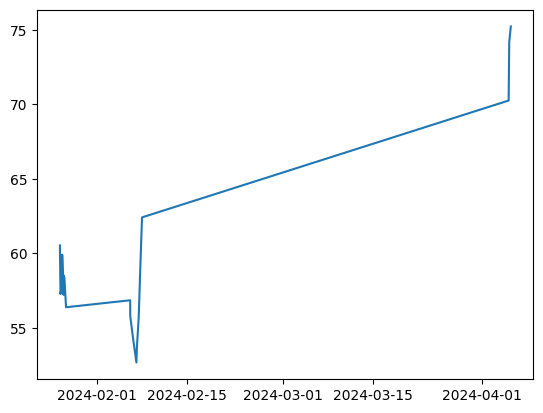

In [46]:
plt.figure()
x = [pd.Timestamp(entry[0]).to_numpy() for entry in binzel_1_data]
y = [entry[1] for entry in binzel_1_data]
plt.plot(x, y)

In [47]:
entry = find_entry_by_id(data, "KAA3G1224240R04_20240206_143800-FOLGE37")

failure3 = find_entry_by_id(data, "KAA3G1224240R04_20240127_061510-FOLGE37")

Text(0.5, 1.0, 'Inverse wire speed ratio')

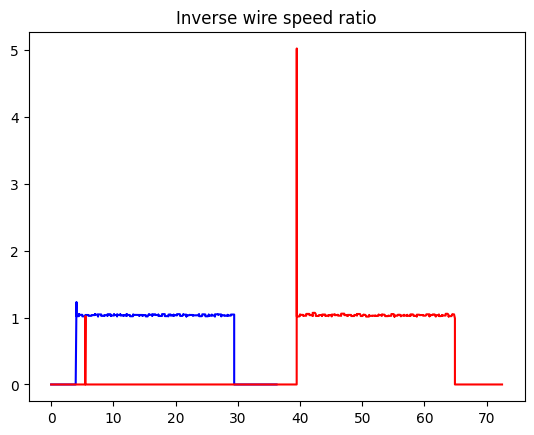

In [51]:
x3 = entry['time']
y3 = entry['inverse_wire_speed_projection']

plt.plot(x3, y3, color='blue', label="Normal")

x4 = failure3['time']
y4 = failure3['inverse_wire_speed_projection']
plt.plot(x4, y4, color='red', label="Anomaly")
plt.legend()
plt.title("Inverse wire speed ratio")

In [49]:
entry

,id,robot,program,timestamp,time,given_laser_power,given_wire_speed,real_wire_speed,binzel_motor_0_current,binzel_motor_1_current,scansonic_head_angle,scansonic_tip_depth,model,no,wire_speed_projection,inverse_wire_speed_projection
0,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:37:26.364Z,0.000,0.0,0.0,0.0,0,49,0.000183,0.001953,10,11,0.0,0.0
1,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:37:26.570Z,0.206,0.0,0.0,0.0,0,49,0.000183,0.001953,10,11,0.0,0.0
2,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:37:26.776Z,0.412,0.0,0.0,0.0,0,49,0.000183,0.001953,10,11,0.0,0.0
3,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:37:27.014Z,0.650,0.0,0.0,0.0,0,49,0.000183,0.001953,10,11,0.0,0.0
4,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:37:27.204Z,0.840,0.0,0.0,0.0,0,49,0.000183,0.001953,10,11,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:38:01.975Z,35.611,0.0,0.0,0.0,0,45,0.000183,0.001862,10,11,0.0,0.0
283,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:38:02.181Z,35.817,0.0,0.0,0.0,0,45,0.000183,0.001862,10,11,0.0,0.0
284,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:38:02.292Z,35.928,0.0,0.0,0.0,0,45,0.000183,0.001892,10,11,0.0,0.0
285,KAA3G1224240R04_20240206_143800-FOLGE37,KAA3G1224240R04,FOLGE37,2024-02-06T14:38:02.292Z,35.928,0.0,0.0,0.0,0,45,0.000183,0.001892,10,11,0.0,0.0
